<a href="https://colab.research.google.com/github/MARKMIRUKA/Accident-Prediction/blob/main/Accident_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

accidentDataset = pd.read_csv('/content/accident data.csv')
print("Shape of dataset : ", accidentDataset.shape)
accidentDataset.head()

Shape of dataset :  (660679, 14)


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [2]:
data= accidentDataset.loc[:,['Accident_Severity','Road_Surface_Conditions']]
data.head()

,Accident_Severity,Road_Surface_Conditions
0,Serious,Dry
1,Serious,Wet or damp
2,Serious,Dry
3,Serious,Dry
4,Slight,Dry


In [3]:
# Display unique values in Accident_Severity column
unique_severity = data['Accident_Severity'].unique()
print("Unique values in Accident_Severity:", unique_severity)

# Display unique values in Road_Surface_Conditions column
unique_surface_conditions = data['Road_Surface_Conditions'].unique()
print("Unique values in Road_Surface_Conditions:", unique_surface_conditions)


Unique values in Accident_Severity: ['Serious' 'Slight' 'Fatal']
Unique values in Road_Surface_Conditions: ['Dry' 'Wet or damp' 'Snow' 'Frost or ice' 'Flood over 3cm. deep' nan]


In [4]:
# Check for missing values in each column
print(data.isnull().sum())


Accident_Severity            0
Road_Surface_Conditions    726
dtype: int64


In [5]:
# Display data types of each column
print(data.dtypes)


Accident_Severity          object
Road_Surface_Conditions    object
dtype: object


In [6]:
# Check for duplicates
print(data.duplicated().sum())


660661


In [7]:
# Preview the first few rows of the dataset
print(data.head())


  Accident_Severity Road_Surface_Conditions
0           Serious                     Dry
1           Serious             Wet or damp
2           Serious                     Dry
3           Serious                     Dry
4            Slight                     Dry


In [9]:
# Drop rows with missing values
data.dropna(subset=['Road_Surface_Conditions'], inplace=True)

In [10]:
severity_mapping = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
data['Accident_Severity'] = data['Accident_Severity'].map(severity_mapping)


In [11]:
surface_mapping = {'Dry': 1, 'Wet or damp': 2, 'Snow': 3, 'Frost or ice': 4, 'Flood over 3cm. deep': 5, 'Unknown': 6}
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].map(surface_mapping)


In [12]:
# Preview the first few rows of the cleaned dataset
print(data.head())


   Accident_Severity  Road_Surface_Conditions
0                  2                        1
1                  2                        2
2                  2                        1
3                  2                        1
4                  1                        1


In [13]:
# Check for missing values again
print(data.isnull().sum())


Accident_Severity          0
Road_Surface_Conditions    0
dtype: int64


In [14]:
# Display data types of each column
print(data.dtypes)


Accident_Severity          int64
Road_Surface_Conditions    int64
dtype: object


In [15]:
# Summary statistics for numerical columns
print(data.describe())


       Accident_Severity  Road_Surface_Conditions
count      659953.000000            659953.000000
mean            1.159807                 1.391099
std             0.400637                 0.665456
min             1.000000                 1.000000
25%             1.000000                 1.000000
50%             1.000000                 1.000000
75%             1.000000                 2.000000
max             3.000000                 5.000000


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
# Assuming your cleaned dataset is in a variable called `data`
X = data[['Road_Surface_Conditions']]  # Independent variable
y = data['Accident_Severity']           # Dependent variable


In [18]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [21]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 0.16
R² Score: 0.00


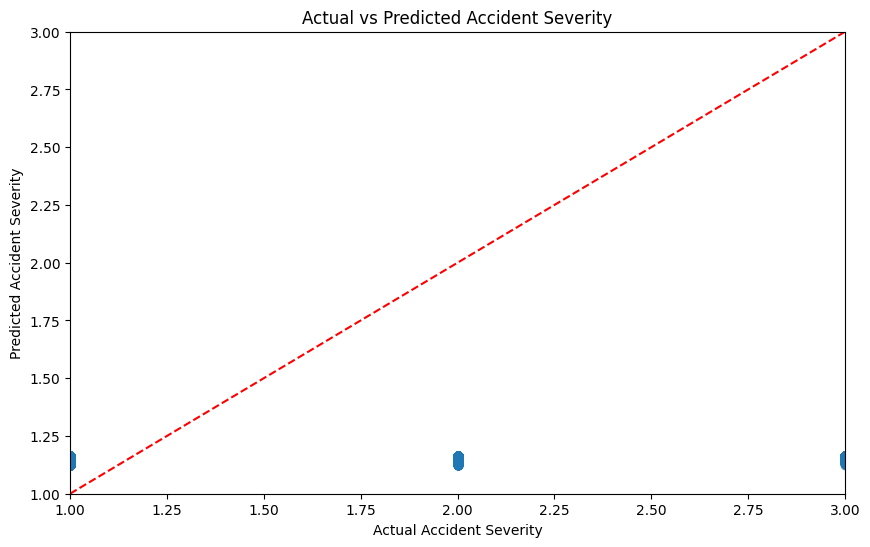

In [22]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Accident Severity')
plt.ylabel('Predicted Accident Severity')
plt.title('Actual vs Predicted Accident Severity')
plt.plot([1, 3], [1, 3], '--', color='red')  # Reference line
plt.xlim(1, 3)
plt.ylim(1, 3)
plt.show()


In [23]:
# Create a DataFrame for hypothetical data
hypothetical_data = pd.DataFrame({
    'Road_Surface_Conditions': [1, 2, 3, 4, 5]  # Hypothetical road surface conditions
})

# Display the hypothetical data
print("Hypothetical Data:")
print(hypothetical_data)


Hypothetical Data:
   Road_Surface_Conditions
0                        1
1                        2
2                        3
3                        4
4                        5


In [24]:
# Make predictions using the hypothetical data
hypothetical_predictions = model.predict(hypothetical_data)

# Display the predictions
predictions_df = pd.DataFrame({
    'Road_Surface_Conditions': hypothetical_data['Road_Surface_Conditions'],
    'Predicted_Accident_Severity': hypothetical_predictions
})

print("\nPredictions for Hypothetical Data:")
print(predictions_df)



Predictions for Hypothetical Data:
   Road_Surface_Conditions  Predicted_Accident_Severity
0                        1                     1.163969
1                        2                     1.153637
2                        3                     1.143305
3                        4                     1.132973
4                        5                     1.122641
